# Object Detection With Ultralytics

Ultralytics YOLOv8 is a popular version of the YOLO (You Only Look Once) object detection and image segmentation model developed by Ultralytics. The YOLOv8 model is designed to be fast, accurate, and easy to use, making it an excellent choice for a wide range of object detection and image segmentation tasks. It can be trained on large datasets and is capable of running on a variety of hardware platforms, from CPUs to GPUs.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

In this lab, we are going to cover:

- Before you start
- Install YOLOv8
- CLI Basics
- Inference with Pre-trained COCO Model
- Roboflow Universe
- Preparing a custom dataset
- Custom Training
- Validate Custom Model
- Inference with Custom Model

## Before you start

Let us make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Apr 16 17:20:34 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 40.0ms
Speed: 3.2ms preprocess, 40.0ms inference, 190.8ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


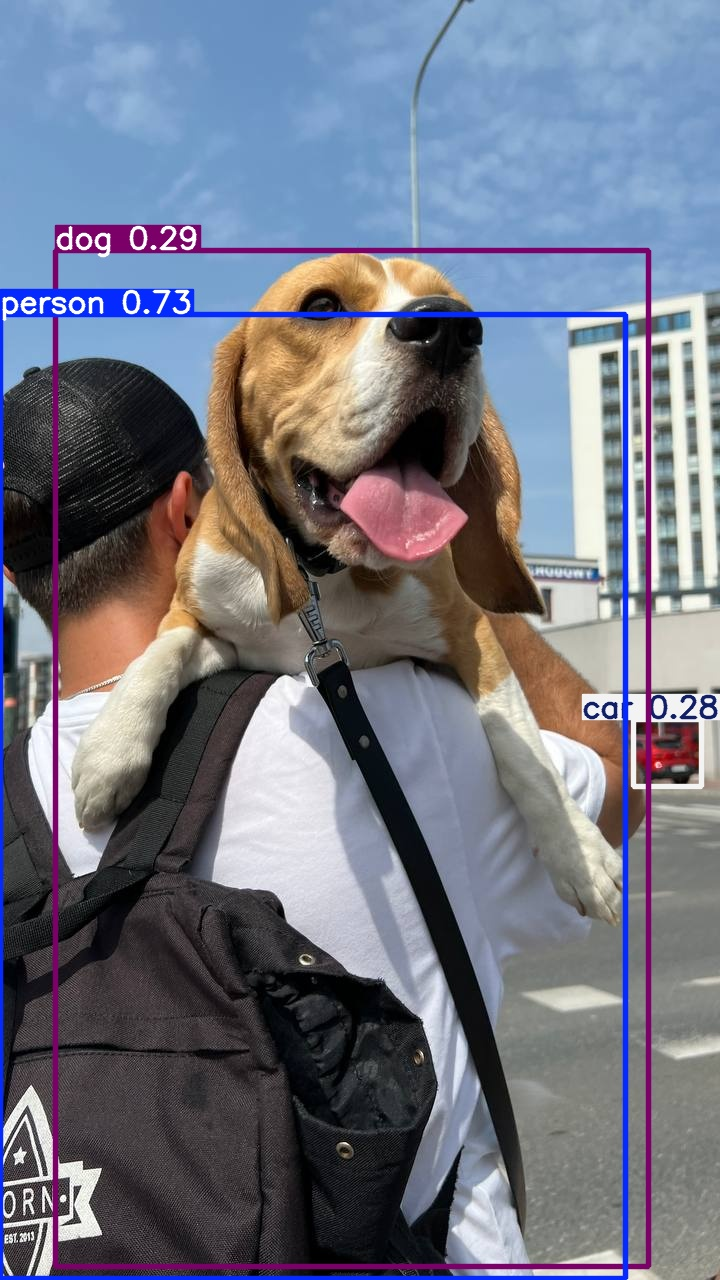

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### Python SDK

The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
!pip install --upgrade pip
!pip install numpy==1.24.3

In [8]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 177.3ms
Speed: 15.8ms preprocess, 177.3ms inference, 210.0ms postprocess per image at shape (1, 3, 640, 384)


In [9]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [10]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [11]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Roboflow Universe

Roboflow Universe is a repository of more than 110,000 open-source datasets that you can use in your projects. You will find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.



## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible.

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In the case of this lab, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>




The examples below work even if you use non-custom model. However, you won't be able to deploy it to Roboflow. To do that, create a custom dataset as described below or fork (copy) one into your workspace from Universe.

In [12]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("model-examples").project("football-players-obj-detection")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 76.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-obj-detection-2 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 6345.68it/s]


## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 163MB/s]
New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/football-players-obj-detection-2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, 

/content


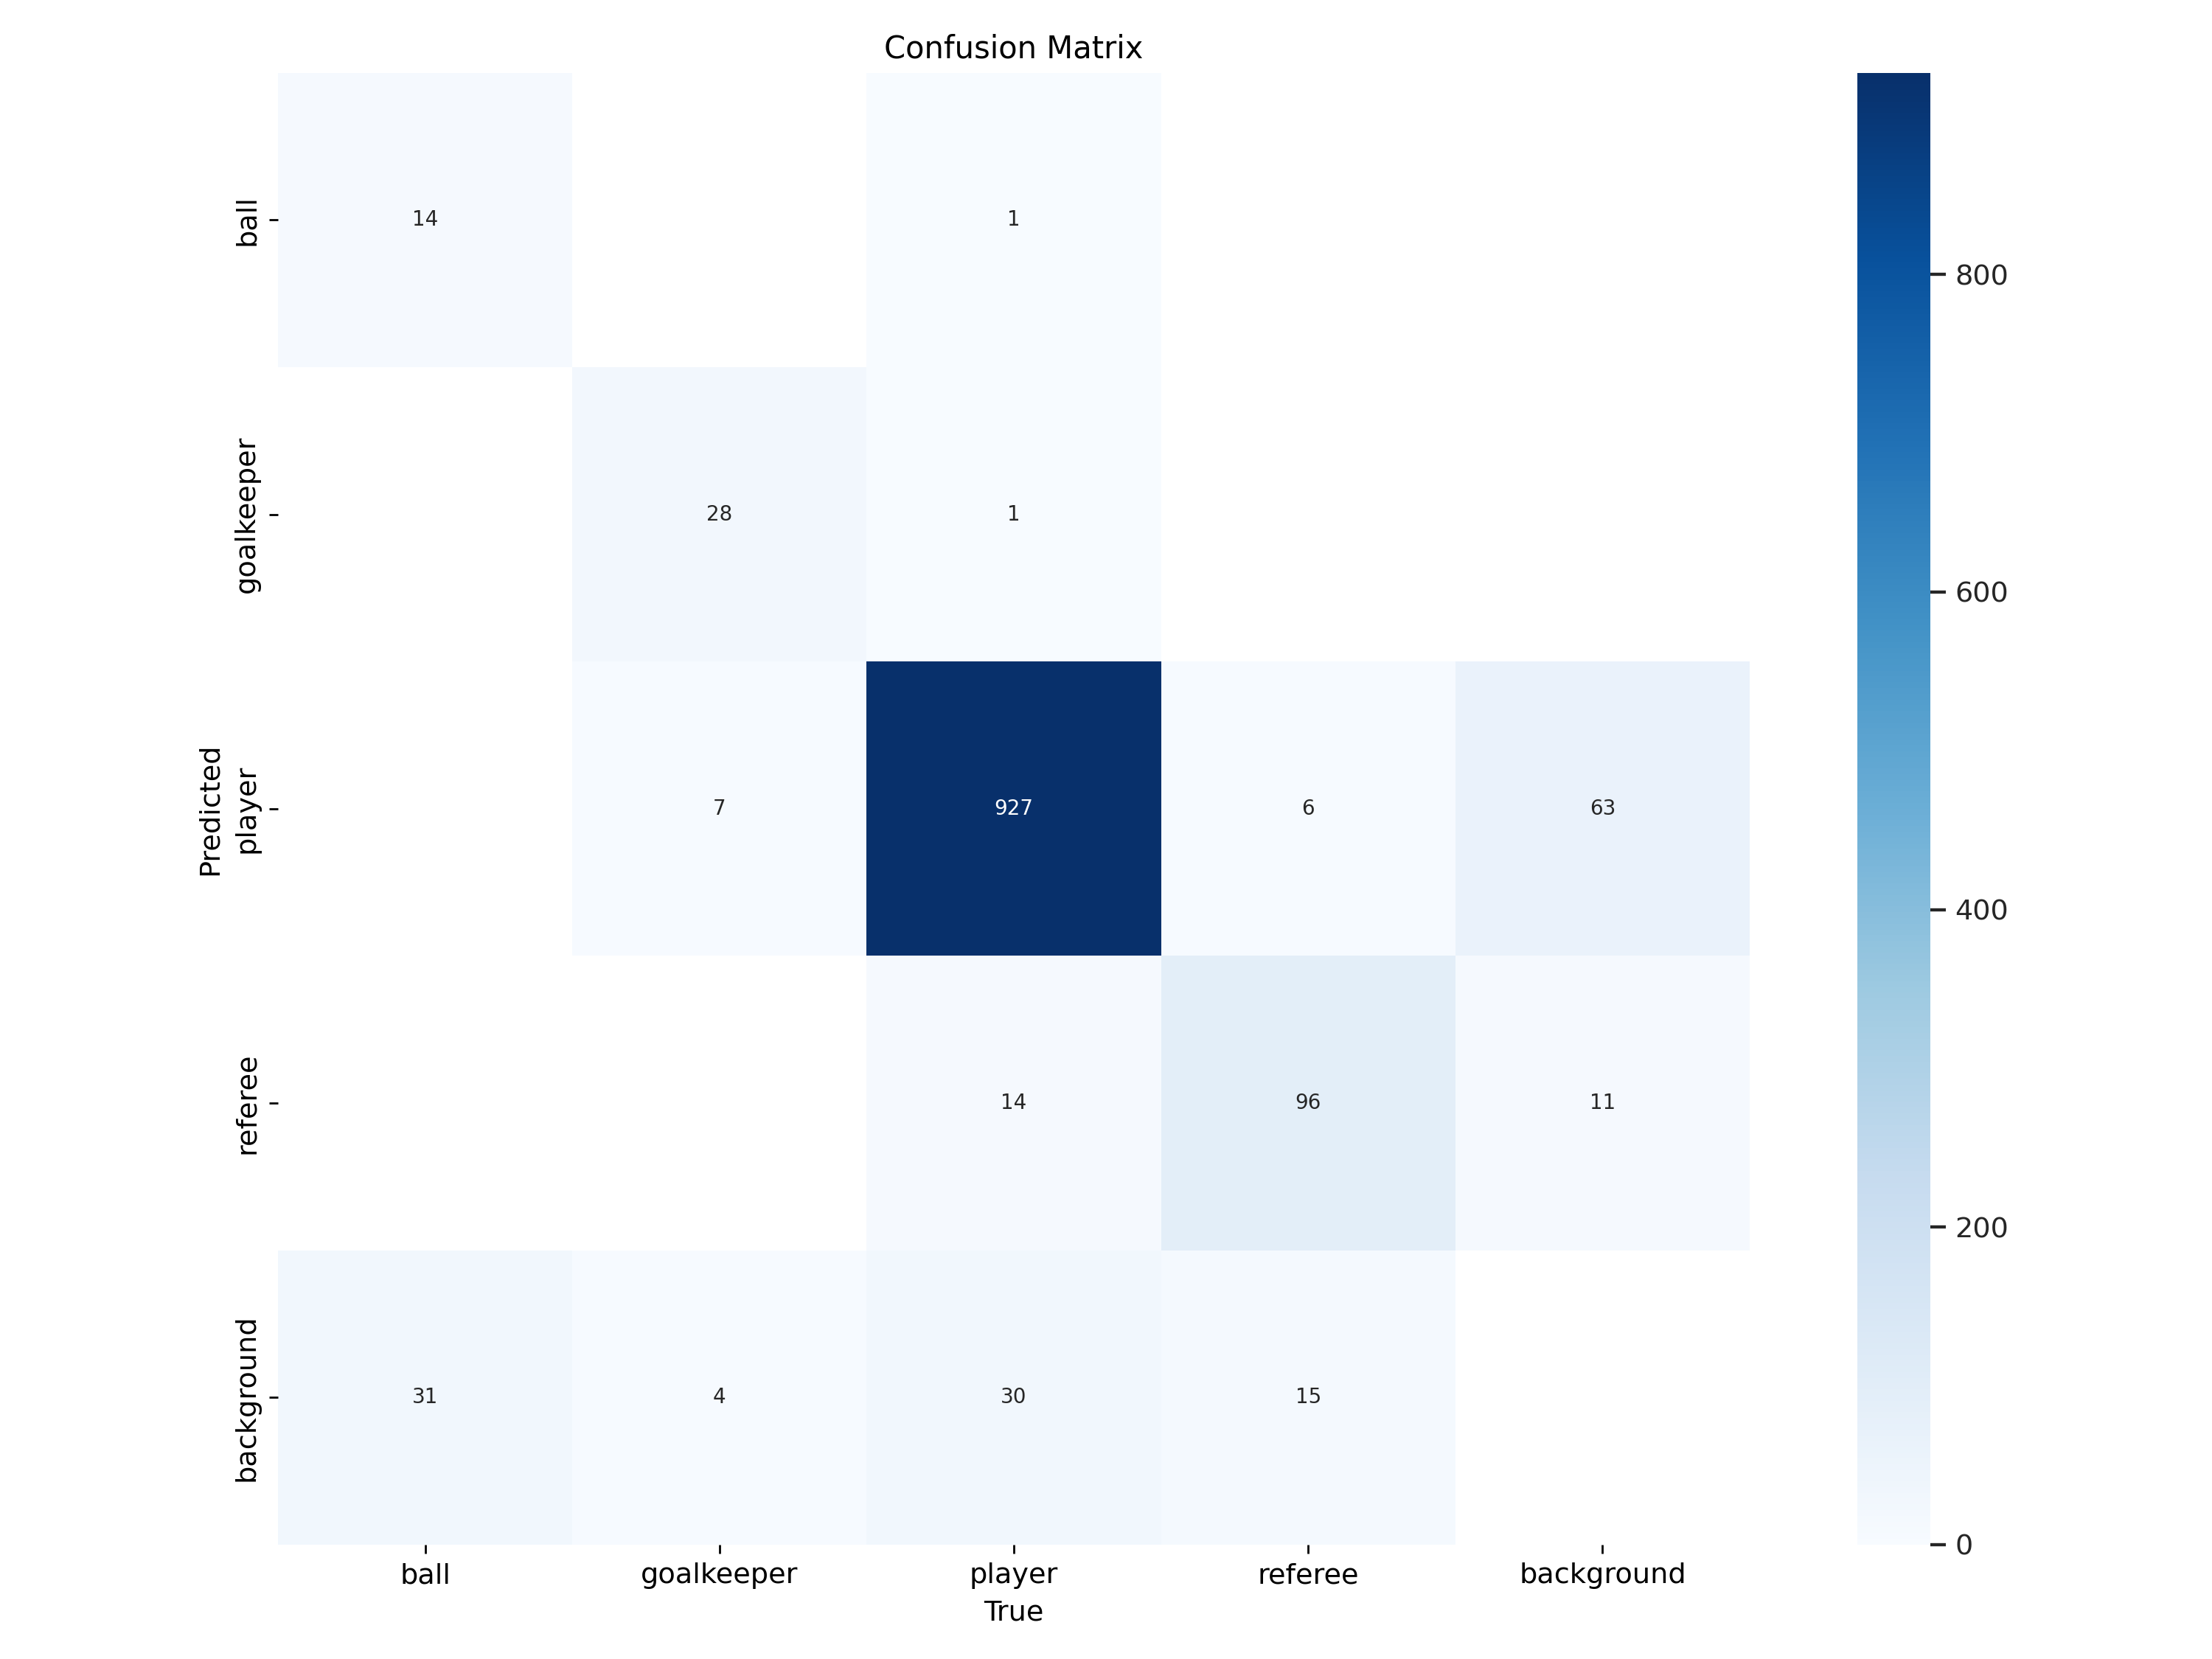

In [14]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


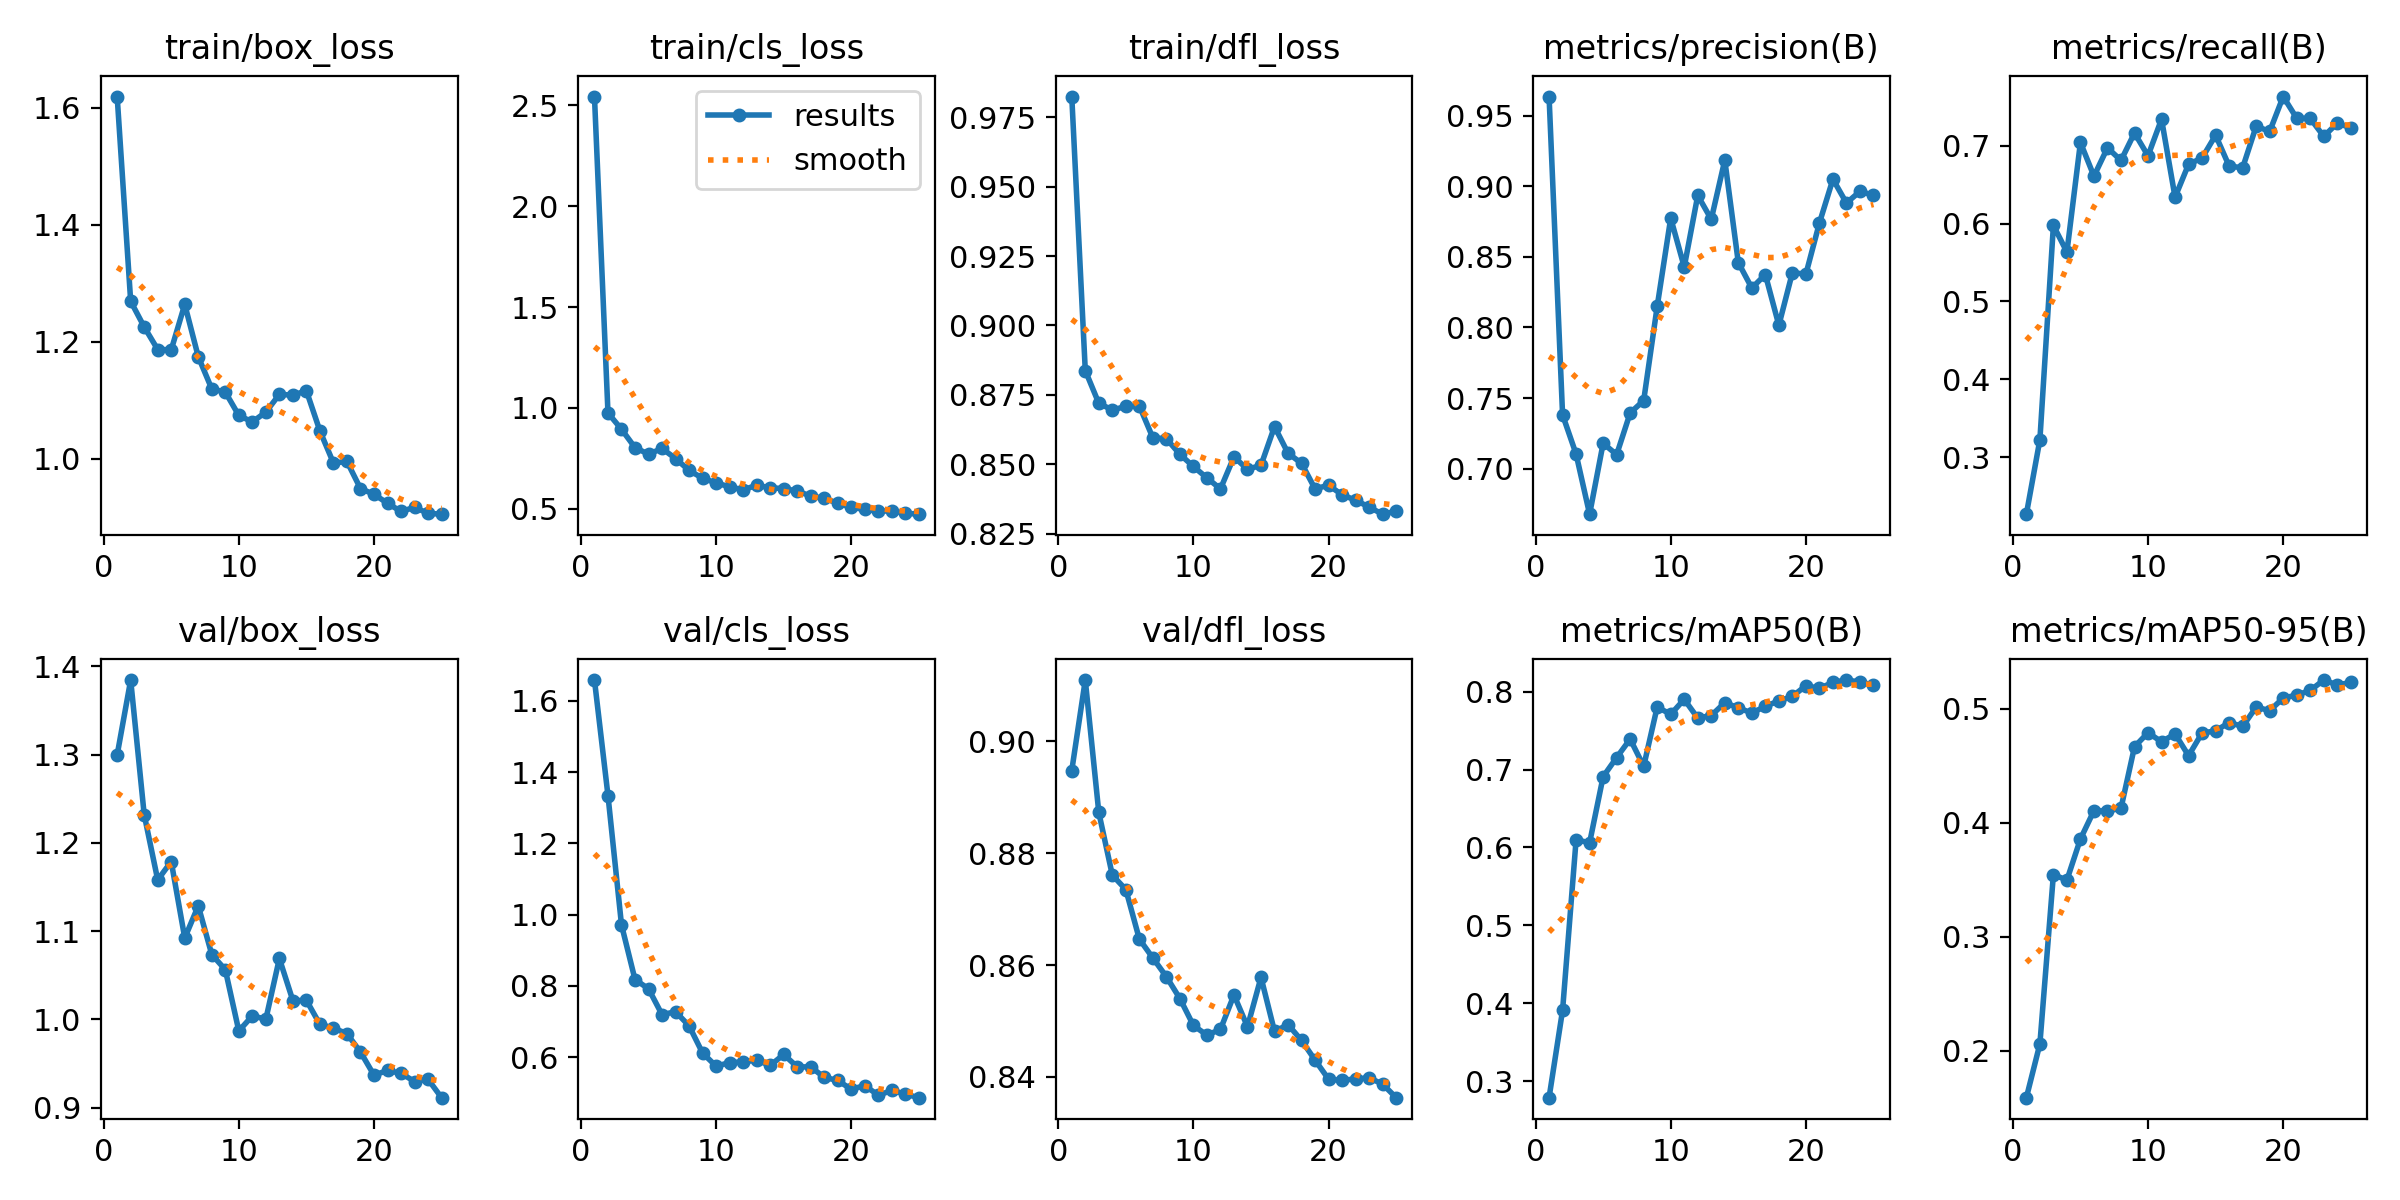

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


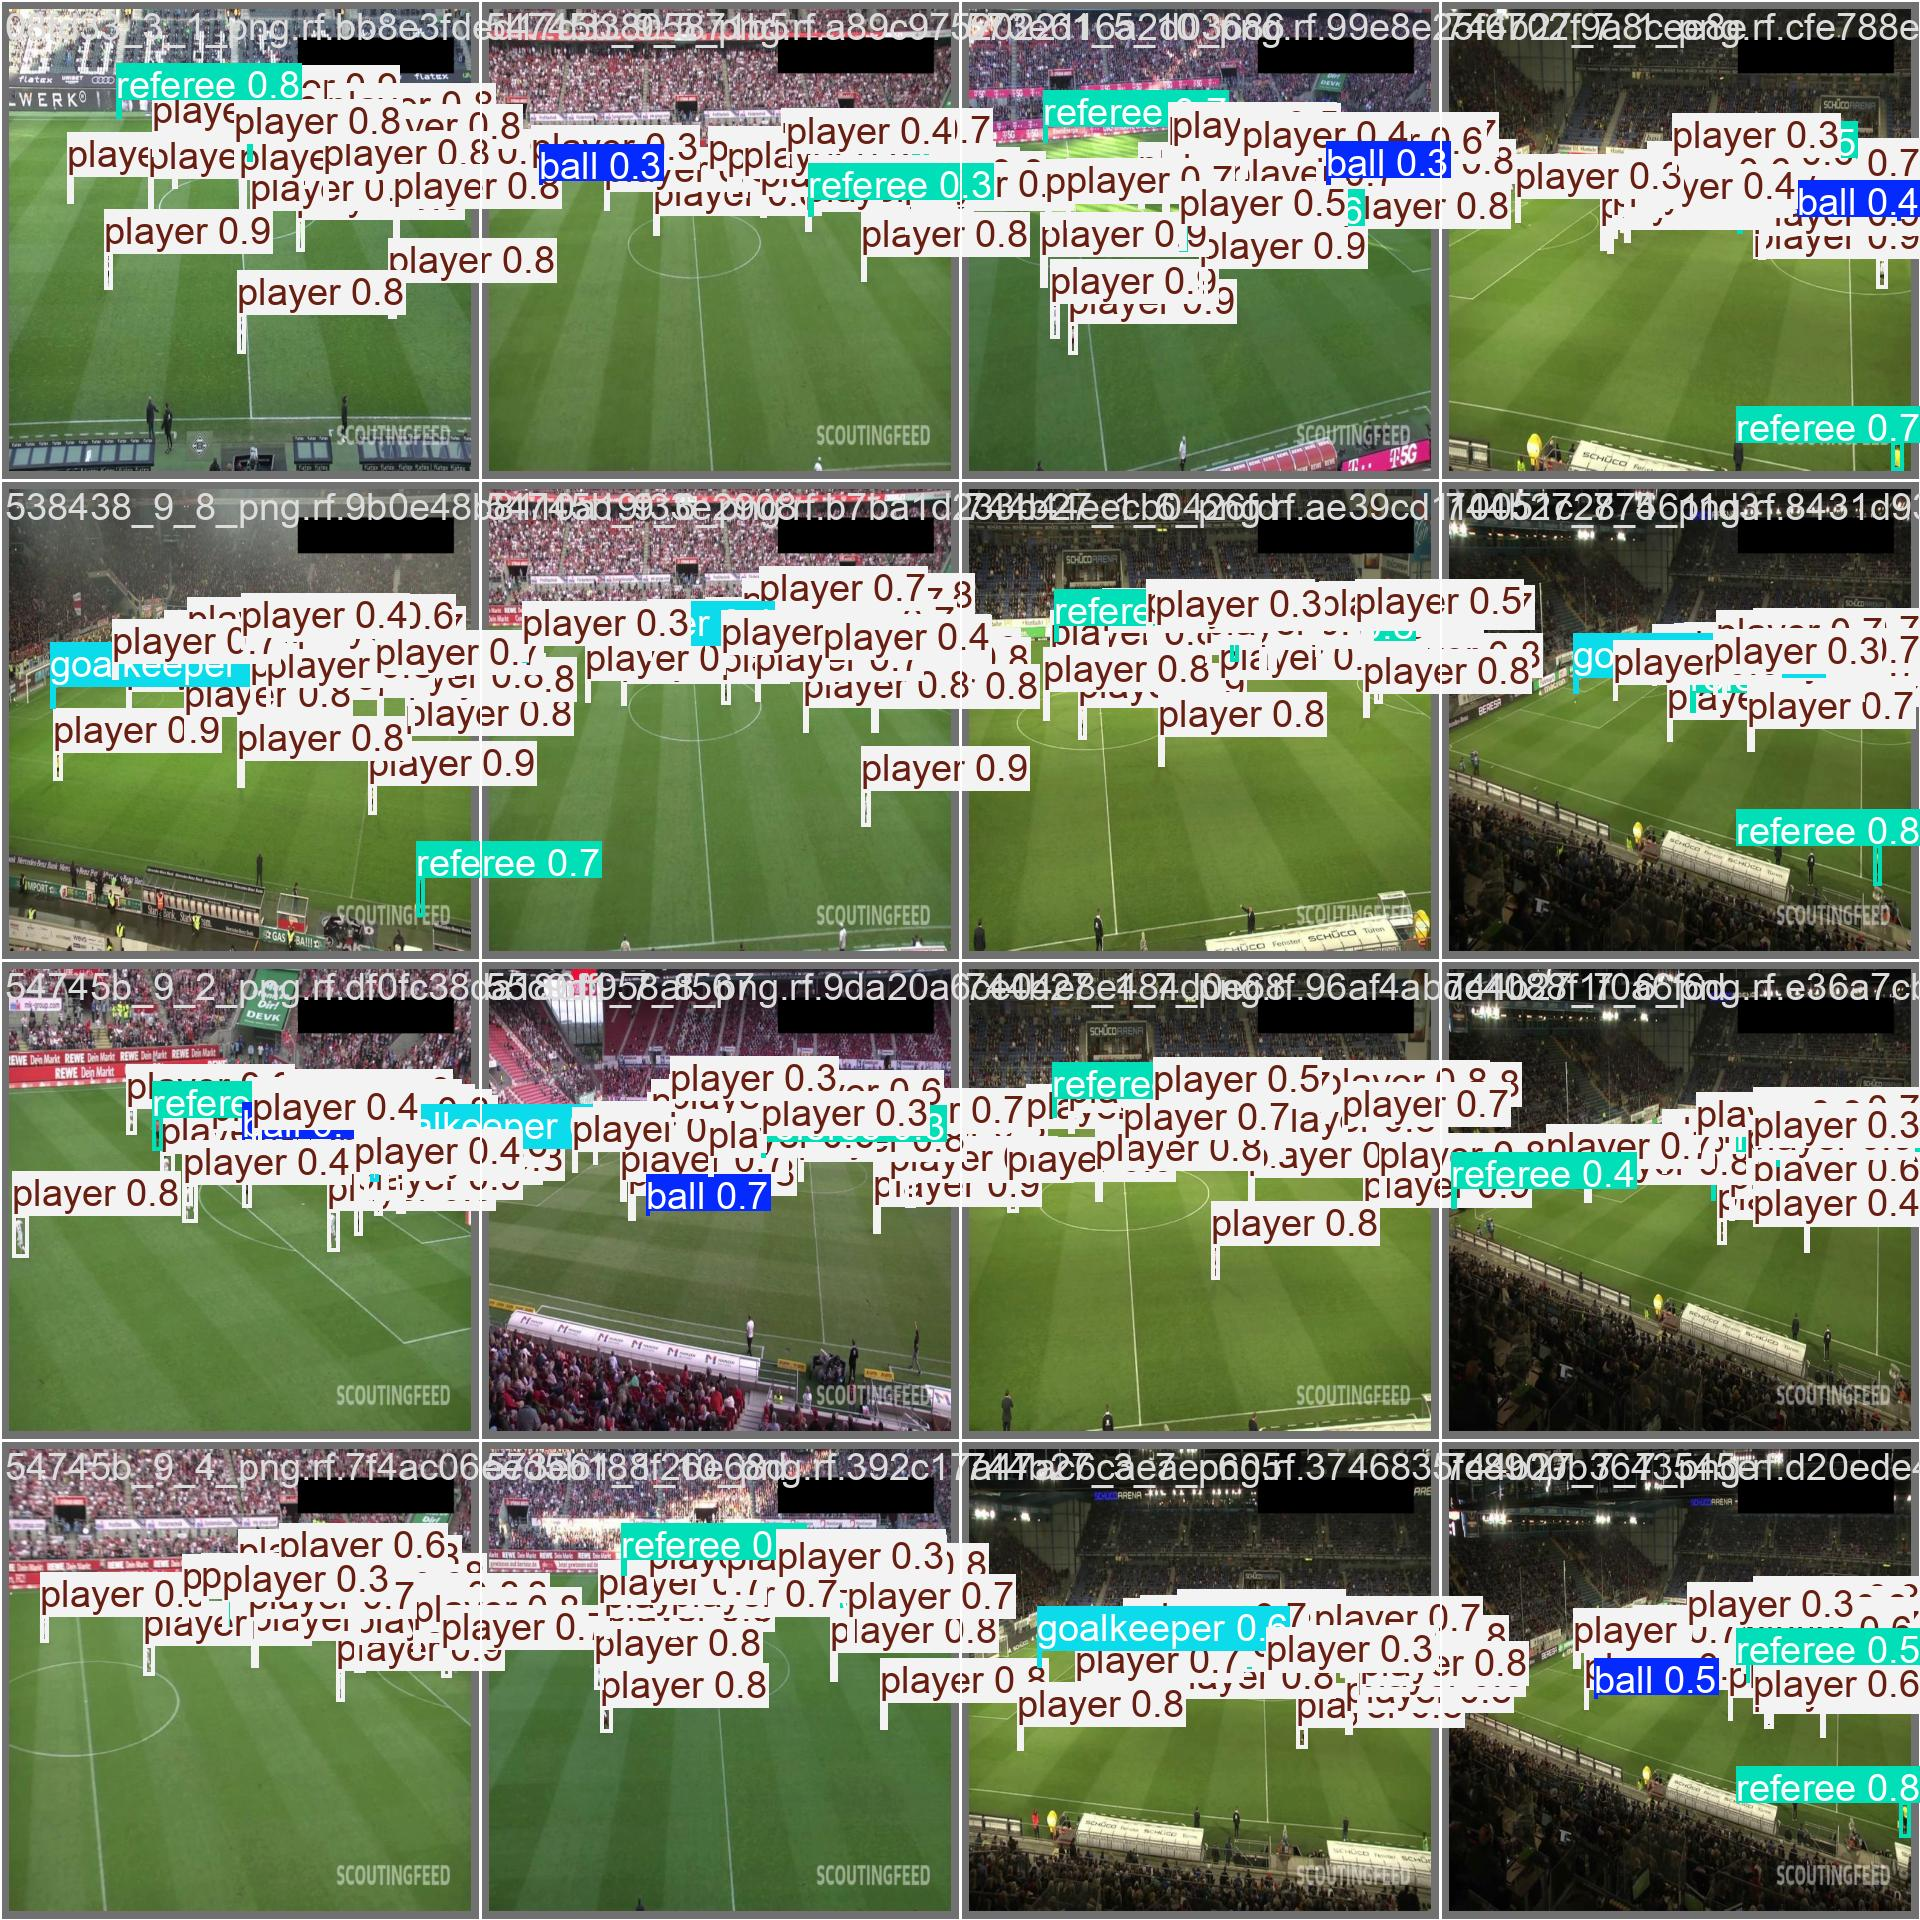

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.14it/s]
                   all         49       1174      0.887      0.738      0.814      0.536
                  ball         45         45      0.841      0.311      0.419      0.205
            goalkeeper         38         39      0.911      0.795      0.931      0.608
                player         49        973      0.949      0.967      0.986      0.745
               referee         49        117      0.846       0.88      0.918      0.586
Speed: 9.0ms preprocess, 25.5ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_3_6_png.rf.d031da4f257bbf91daf9845051fb9487.jpg: 800x800 1 ball, 20 players, 2 referees, 22.9ms
image 2/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_9_3_png.rf.509869506accd728341d8426de2f937a.jpg: 800x800 1 goalkeeper, 21 players, 1 referee, 22.9ms
image 3/25 /content/datasets/football-players-obj-detection-2/test/images/40cd38_7_6_png.rf.57bcce20df01cee3811f2b3576481f41.jpg: 800x800 1 goalkeeper, 21 players, 1 referee, 22.8ms
image 4/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_1_5_png.rf.ec272c23ac9c73ba68d85a630b6d2a22.jpg: 800x800 1 goalkeeper, 22 players, 2 referees, 22.8ms
image 5/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_5_5_png.rf.3fe

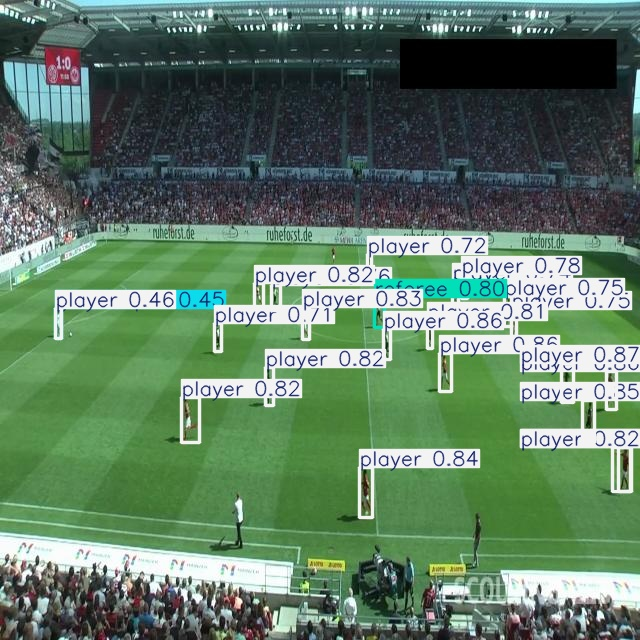

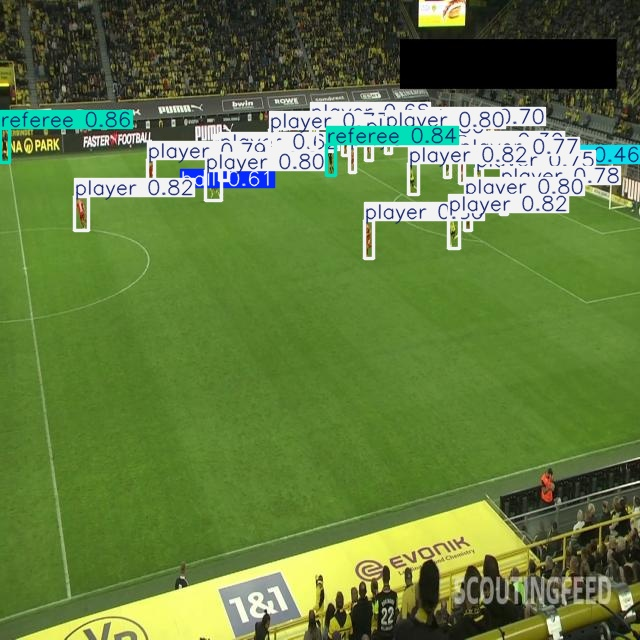

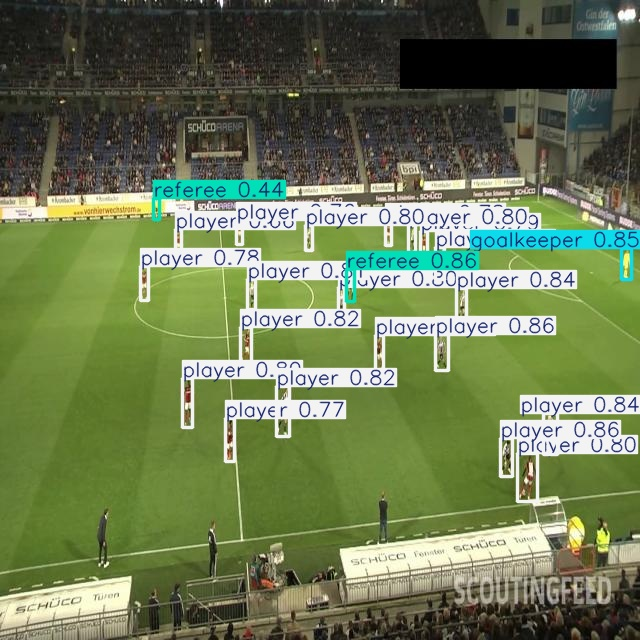

In [ ]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

Follow the links above to check if the upload succeeded. It may take a couple of minutes until the model is visible to the `roboflow` SDK.

In [ ]:
# Run inference on your model on a persistent, auto-scaling, cloud API

# Load model
model = project.version(dataset.version).model
assert model, "Model deployment is still loading"

# Choose a random test image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on 538438_3_6_png.rf.30190e7f052bf4e0429476d612ad6863.jpg


{'predictions': [{'x': 430.0,
   'y': 318.0,
   'width': 12.0,
   'height': 32.0,
   'confidence': 0.914213240146637,
   'class': 'player',
   'class_id': 2,
   'detection_id': '03526ceb-bddc-457e-9039-a4aa65bd692e',
   'image_path': '/content/datasets/football-players-obj-detection-2/test/images/538438_3_6_png.rf.30190e7f052bf4e0429476d612ad6863.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 404.5,
   'y': 323.5,
   'width': 9.0,
   'height': 31.0,
   'confidence': 0.88485187292099,
   'class': 'player',
   'class_id': 2,
   'detection_id': 'a50113b6-79ab-4744-a1dd-2457f27d2932',
   'image_path': '/content/datasets/football-players-obj-detection-2/test/images/538438_3_6_png.rf.30190e7f052bf4e0429476d612ad6863.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 68.5,
   'y': 337.0,
   'width': 13.0,
   'height': 34.0,
   'confidence': 0.8832225799560547,
   'class': 'player',
   'class_id': 2,
   'detection_id': '11128e0f-7e87-47ac-9a6f-e0154878d005',
   'image_p

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.


0: 640x480 4 persons, 1 bus, 1 stop sign, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


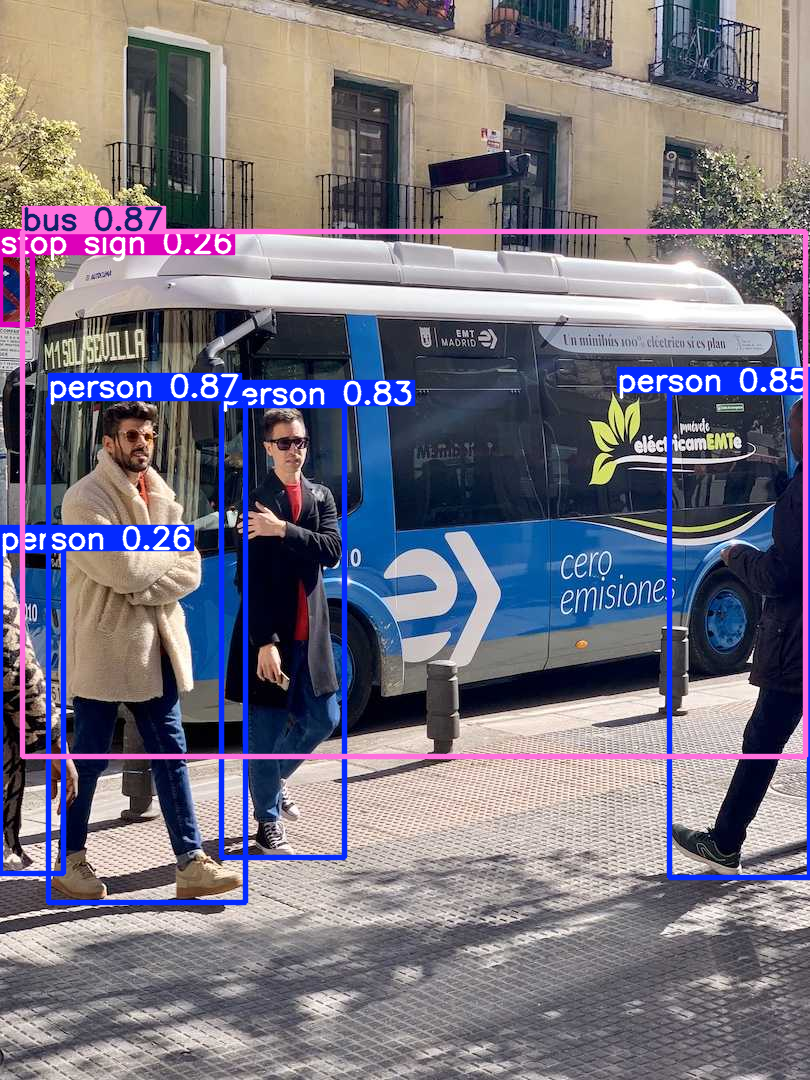

In [ ]:
# ******************************
# TASK 1 - RUN PRETRAINED YOLOV8
# ******************************

# Learn to use a pretrained YOLOv8 model for inference. Use the
# Ultralytics package to load a pretrained yolov8n or yolov8s model.
# Perform inference on a sample image from the internet or a live webcam
# stream (if possible). Display the detection results with bounding
# boxes and class labels.

# WRITE YOUR CODE HERE
from ultralytics import YOLO
import cv2
import numpy as np
import requests

# Load a pretrained YOLOv8 model (nano or small version)
model = YOLO('yolov8n.pt')  # or 'yolov8s.pt'

# Sample image from the internet
image_url = 'https://ultralytics.com/images/bus.jpg'
response = requests.get(image_url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)

# Inference
results = model(image)

# Visualize
results[0].show()  # Opens a window with bounding boxes and labels

from google.colab.patches import cv2_imshow
annotated_image = results[0].plot()
cv2_imshow(annotated_image)

# ******************************
# ******************************

# Medical Pills Detection using Ultralytics YOLO11

## Dataset Structure

The medical-pills dataset is divided into two subsets:

- **Training set**: Consisting of 92 images, each annotated with the class `pill`.
- **Validation set**: Comprising 23 images with corresponding annotations.

## Applications

Using computer vision for medical-pills detection enables automation in the pharmaceutical industry, supporting tasks like:

- **Pharmaceutical Sorting**: Automating the sorting of pills based on size, shape, or color to enhance production efficiency.
- **AI Research and Development**: Serving as a benchmark for developing and testing computer vision algorithms in pharmaceutical use cases.
- **Digital Inventory Systems**: Powering smart inventory solutions by integrating automated pill recognition for real-time stock monitoring and replenishment planning.

## Setup

pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [17]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.6/112.6 GB disk)


## Dataset YAML File

A YAML (Yet Another Markup Language) file defines the dataset configuration, including paths, classes, and other pertinent details.

```yaml
# Ultralytics YOLO 🚀, AGPL-3.0 license
# Medical-pills dataset by Ultralytics
# Documentation: https://docs.ultralytics.com/datasets/detect/medical-pills/
# Example usage: yolo train data=medical-pills.yaml
# parent
# ├── ultralytics
# └── datasets
#     └── medical-pills  ← downloads here (8.19 MB)

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: ../datasets/medical-pills # dataset root dir
train: train/images # train images (relative to 'path') 92 images
val: valid/images # val images (relative to 'path') 23 images
test: # test images (relative to 'path')

# Classes
names:
  0: pill

# Download script/URL (optional)
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/medical-pills.zip
```

## Train

In [19]:
import zipfile
import urllib.request
import os

# Step 1: Create a folder
os.makedirs("datasets", exist_ok=True)

# Step 2: Download the zip file
url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/medical-pills.zip"
zip_path = "datasets/medical-pills.zip"
urllib.request.urlretrieve(url, zip_path)

# Step 3: Extract it
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("datasets/medical-pills")


In [24]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/yolov8n.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data="datasets/medical-pills/medical-pills.yaml", epochs=20, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.109 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolov8n.pt, data=datasets/medical-pills/medical-pills.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embe

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CON

AMP: checks passed ✅


train: Scanning /content/datasets/medical-pills/train/labels... 92 images, 0 backgrounds, 0 corrupt: 100%|██████████| 92/92 [00:00<00:00, 2196.70it/s]

train: New cache created: /content/datasets/medical-pills/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/datasets/medical-pills/valid/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 1455.45it/s]

val: New cache created: /content/datasets/medical-pills/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       1/20       2.6G      1.697      3.491       1.44        373        640: 100%|██████████| 6/6 [00:03<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         23        399     0.0558      0.965      0.132     0.0812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       2/20      2.32G      1.191      2.657       1.07        311        640: 100%|██████████| 6/6 [00:01<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all         23        399     0.0575      0.995      0.246      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       3/20      2.47G       1.07      1.278     0.9794        336        640: 100%|██████████| 6/6 [00:01<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         23        399     0.0575      0.995      0.966      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       4/20      2.31G      1.001     0.8861     0.9442        396        640: 100%|██████████| 6/6 [00:01<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all         23        399      0.997      0.738       0.98      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       5/20      2.59G     0.9821     0.7509     0.9399        403        640: 100%|██████████| 6/6 [00:01<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         23        399       0.99       0.89       0.98      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       6/20      2.63G     0.9641     0.7101     0.9635        388        640: 100%|██████████| 6/6 [00:01<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         23        399      0.985       0.96      0.982      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       7/20      2.43G     0.9462     0.6825     0.9589        377        640: 100%|██████████| 6/6 [00:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         23        399      0.985       0.96      0.982      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       8/20      2.53G     0.9079     0.6417     0.9329        407        640: 100%|██████████| 6/6 [00:01<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         23        399      0.987      0.975      0.986      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
       9/20      2.33G     0.8796     0.6325     0.9354        302        640: 100%|██████████| 6/6 [00:01<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         23        399      0.988      0.987      0.985      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      10/20      2.28G     0.8819     0.6295     0.9299        433        640: 100%|██████████| 6/6 [00:01<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23        399      0.992       0.99      0.992      0.749


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      11/20      2.26G     0.9052     0.7606     0.9292        197        640: 100%|██████████| 6/6 [00:02<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         23        399      0.982      0.987      0.993       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      12/20      2.18G     0.8828     0.6898      0.922        203        640: 100%|██████████| 6/6 [00:01<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         23        399      0.975      0.985      0.993      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      13/20      2.19G      0.886     0.6569     0.9257        195        640: 100%|██████████| 6/6 [00:01<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         23        399      0.988      0.977      0.992      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      14/20      2.18G     0.8479     0.6143     0.9205        206        640: 100%|██████████| 6/6 [00:01<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         23        399      0.985      0.985      0.993      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      15/20      2.18G      0.867     0.6144     0.9324        199        640: 100%|██████████| 6/6 [00:01<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all         23        399      0.977      0.985      0.993      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      16/20      2.18G     0.8261     0.5983     0.9192        197        640: 100%|██████████| 6/6 [00:01<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         23        399      0.985       0.98      0.992      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      17/20      2.18G     0.8331     0.5843     0.9147        198        640: 100%|██████████| 6/6 [00:01<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all         23        399      0.985      0.982      0.992      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      18/20      2.19G      0.842     0.5783     0.9011        203        640: 100%|██████████| 6/6 [00:01<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         23        399      0.984       0.98      0.992      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      19/20      2.18G     0.8135     0.5519     0.9053        218        640: 100%|██████████| 6/6 [00:01<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]

                   all         23        399      0.978      0.985      0.991      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/6 [00:00<?, ?it/s]Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
      20/20      2.18G     0.7995     0.5424      0.909        202        640: 100%|██████████| 6/6 [00:01<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         23        399      0.978      0.985      0.991      0.782



20 epochs completed in 0.015 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CON

                   all         23        399      0.978      0.985      0.991      0.784
Speed: 0.5ms preprocess, 1.8ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train2


![Medical-pills dataset sample image](https://github.com/ultralytics/docs/releases/download/0/medical-pills-dataset-sample-image.avif)

## Predict

YOLO11 may be used directly in the Command Line Interface (CLI) with a yolo command for a variety of tasks and modes and accepts additional arguments, i.e. imgsz=640. See a full list of available [yolo arguments](https://docs.ultralytics.com/usage/cfg/) and other details in the [YOLO11 Predict Docs](https://docs.ultralytics.com/modes/train/).

In [29]:
from ultralytics import YOLO

# Load a model
model = YOLO("runs/detect/train2/weights/best.pt")

# Inference using the model
results = model.predict("https://ultralytics.com/assets/medical-pills-sample.jpg", save=True)


Found https://ultralytics.com/assets/medical-pills-sample.jpg locally at medical-pills-sample.jpg
image 1/1 /content/medical-pills-sample.jpg: 384x640 19 pills, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://github.com/user-attachments/assets/8d75b15f-fe12-4bee-8609-df276cb0f193" width="600">

## Export

Export a YOLO11 model to any supported format below with the `format` argument, i.e. `format=onnx`. See [YOLO11 Export Docs](https://docs.ultralytics.com/modes/export/) for more information.

- Tip: Export to [ONNX](https://docs.ultralytics.com/integrations/onnx/) or [OpenVINO](https://docs.ultralytics.com/integrations/openvino/) for up to 3x CPU speedup.  
- Tip: Export to [TensorRT](https://docs.ultralytics.com/integrations/tensorrt/) for up to 5x GPU speedup.

| Format                                                                   | `format` Argument | Model                     | Metadata | Arguments                                                            |
|--------------------------------------------------------------------------|-------------------|---------------------------|----------|----------------------------------------------------------------------|
| [PyTorch](https://pytorch.org/)                                          | -                 | `yolo11n.pt`              | ✅        | -                                                                    |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript)     | `torchscript`     | `yolo11n.torchscript`     | ✅        | `imgsz`, `optimize`, `batch`                                         |
| [ONNX](https://docs.ultralytics.com/integrations/onnx)                   | `onnx`            | `yolo11n.onnx`            | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `opset`, `batch`             |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino)           | `openvino`        | `yolo11n_openvino_model/` | ✅        | `imgsz`, `half`, `dynamic`, `int8`, `batch`                          |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt)           | `engine`          | `yolo11n.engine`          | ✅        | `imgsz`, `half`, `dynamic`, `simplify`, `workspace`, `int8`, `batch` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml)               | `coreml`          | `yolo11n.mlpackage`       | ✅        | `imgsz`, `half`, `int8`, `nms`, `batch`                              |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model`     | `yolo11n_saved_model/`    | ✅        | `imgsz`, `keras`, `int8`, `batch`                                    |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef)     | `pb`              | `yolo11n.pb`              | ❌        | `imgsz`, `batch`                                                     |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite)              | `tflite`          | `yolo11n.tflite`          | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu)        | `edgetpu`         | `yolo11n_edgetpu.tflite`  | ✅        | `imgsz`                                                              |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs)                  | `tfjs`            | `yolo11n_web_model/`      | ✅        | `imgsz`, `half`, `int8`, `batch`                                     |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle)   | `paddle`          | `yolo11n_paddle_model/`   | ✅        | `imgsz`, `batch`                                                     |
| [MNN](https://docs.ultralytics.com/integrations/mnn)                     | `mnn`             | `yolo11n.mnn`             | ✅        | `imgsz`, `batch`, `int8`, `half`                                     |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn)                   | `ncnn`            | `yolo11n_ncnn_model/`     | ✅        | `imgsz`, `half`, `batch`                                             |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500)          | `imx`             | `yolov8n_imx_model/`      | ✅        | `imgsz`, `int8`                                                      |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn)          | `rknn`            | `yolo11n_rknn_model/`     | ✅        | `imgsz`, `batch`, `name`                                             |

In [30]:
# ***********************************
# TASK 2 - EVALUATE MODEL PERFORMANCE
# ***********************************

# Load the pretrained YOLOv8 model. Run evaluation on the coco128
# dataset (a lightweight version of MS COCO). Observe the mAP, precision,
# and recall. Explain what these metrics show and mean.

# WRITE YOUR CODE HERE
from ultralytics import YOLO

# Step 1: Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")  # You can also use 'yolov8s.pt' for a slightly larger model

# Step 2: Run evaluation on coco128 dataset
results = model.val(data="coco128.yaml")  # built-in dataset in Ultralytics

# ***********************************
# ***********************************

Ultralytics YOLOv8.2.103 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco128.yaml' images not found ⚠️, missing path '/content/datasets/coco128/images/train2017'


100%|██████████| 6.66M/6.66M [00:00<00:00, 79.4MB/s]
Unzipping /content/datasets/coco128.zip to /content/datasets/coco128...: 100%|██████████| 263/263 [00:00<00:00, 4218.52file/s]

Dataset download success ✅ (0.6s), saved to /content/datasets




val: Scanning /content/datasets/coco128/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<00:00, 2270.59it/s]

val: New cache created: /content/datasets/coco128/labels/train2017.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.69it/s]


                   all        128        929       0.64      0.537      0.605      0.446
                person         61        254      0.797      0.677      0.764      0.538
               bicycle          3          6      0.514      0.333      0.315      0.264
                   car         12         46      0.813      0.217      0.273      0.168
            motorcycle          4          5      0.687      0.887      0.898      0.685
              airplane          5          6       0.82      0.833      0.927      0.675
                   bus          5          7      0.491      0.714      0.728      0.671
                 train          3          3      0.534      0.667      0.706      0.604
                 truck          5         12          1      0.332      0.473      0.297
                  boat          2          6      0.226      0.167      0.316      0.134
         traffic light          4         14      0.734        0.2      0.202      0.139
             stop sig

# **TASK 1 - RUN PRETRAINED YOLOv8**

In this task, I explored how to use a pretrained **YOLOv8** model for object detection using the **Ultralytics** package. The goal was to perform inference on a sample image obtained from the internet and visualize the detected objects along with their corresponding bounding boxes and class labels.

#### **Steps Performed**:
- **Model Loading:**  
  I loaded a pretrained YOLOv8 model (`yolov8n.pt` or `yolov8s.pt`), which comes trained on the COCO dataset and is capable of detecting multiple common object categories.

- **Image Retrieval:**  
  An image was fetched from a publicly available URL using the `requests` library and decoded using OpenCV.

- **Inference:**  
  The YOLO model was used to run inference on the image. It predicted the locations and classes of objects present in the image.

- **Visualization:**  
  The detection results were visualized using bounding boxes and class labels. We displayed the annotated image using OpenCV's display functionality compatible with Google Colab.

#### **Objective:**
This task helped build a foundational understanding of how to:
- Use pretrained YOLOv8 models,
- Perform object detection on custom or online images,
- Display results in an interactive and visual format.

By completing this task, I gained practical experience with the inference pipeline of YOLOv8 and prepared ourselves for custom dataset training and evaluation in future tasks.

---

### **TASK 2 - EVALUATE MODEL PERFORMANCE**

In this task, I evaluated a pretrained **YOLOv8n** object detection model using the lightweight **COCO128** dataset — a smaller subset of the COCO dataset commonly used for quick benchmarking.

#### **Steps Performed**:
- Loaded the pretrained `yolov8n.pt` model using the Ultralytics YOLO library.
- Ran evaluation using the built-in `coco128.yaml` configuration file.
- The dataset was automatically downloaded and extracted.
- The model computed predictions on validation images and evaluated its performance using standard object detection metrics.

#### **Evaluation Metrics**:
The following metrics were observed in the output:

- **Precision (P):**  
  Measures the proportion of correctly identified objects out of all predictions made.  
  $$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $$  
  A high precision means fewer false positives.

- **Recall (R):**  
  Measures the proportion of actual objects that were correctly identified.  
  $$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $$  
  A high recall means the model detects most of the real objects.

- **mAP (mean Average Precision):**  
  - **mAP@0.5:** Average precision calculated at IoU threshold = 0.5. Indicates whether predicted boxes overlap well with ground truth.
  - **mAP@0.5:0.95:** A more challenging and comprehensive version, averaging AP over IoU thresholds from 0.5 to 0.95 in steps of 0.05. It’s the official COCO metric for comparing detectors.

#### **Observed Results** (for all classes):
- **Precision:** `0.64`
- **Recall:** `0.537`
- **mAP@0.5:** `0.605`
- **mAP@0.5:0.95:** `0.446`

These results show that the YOLOv8n model performs reasonably well for general object detection, especially considering its small size and the lightweight evaluation dataset. Some classes like *cat*, *zebra*, and *pizza* achieved very high accuracy, while smaller or more ambiguous objects like *cell phone* and *mouse* showed poor performance — reflecting the typical behavior of lightweight models on complex scenes.

#### **Conclusion**:
This task introduced core object detection evaluation metrics and demonstrated how to validate model performance using a real benchmark dataset. Understanding these metrics is crucial for comparing models, tuning hyperparameters, and optimizing performance for deployment scenarios.
